In [1]:
from tkinter import *
from PIL import Image, ImageTk

img = Image.open("r.png")
root = Toplevel() 
print(img.size)
c = Canvas(root, width=img.size[0], height=img.size[1])
img1 = ImageTk.PhotoImage(img)
c.create_image(0, 0, image=img1,anchor="nw")
c.pack(fill=BOTH)
i=0

def getXY(event):
    print('started')  
    global getx1, gety1, getx2, gety2, getx3, gety3, getx4, gety4, i
    if(i==0):    
        getx1=event.x        
        gety1=event.y
    if(i==1):    
        getx2=event.x        
        gety2=event.y
    if(i==2):    
        getx3=event.x        
        gety3=event.y
    if(i==3):    
        getx4=event.x        
        gety4=event.y
        
    i=i+1

root.bind('<Button-1>',getXY)

root.mainloop()

(579, 868)
started
started
started
started
230 513 222 455 253 452 260 512


In [2]:
import math

x1=getx1
x2=getx2
dx=max(getx4-getx1,getx3-getx2)
x3=x2+dx
x4=x1+dx
y1=max(gety1,gety4)
y4=y1
y2=max(gety2,gety3)
y3=y2
w=dx+x4-x3
h=y1-y2
import numpy

def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

im2 = Image.new('RGBA',(w,h),"#FFFFFF")
img.crop((x2,y3,x4,y1)).save("Letter.png")
img3=Image.open("Letter.png")

#coeffs = find_coeffs(
#        [(0, 0), (256, 0), (256, 256), (0, 256)],
 #       [(0, 0), (256, 0), (x4-x2, y1-y3), (x4-x3, y1-y3)])

#img3.transform((dx, h), Image.PERSPECTIVE, coeffs, Image.BICUBIC).save("sys.argv[3].png")

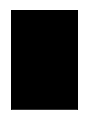

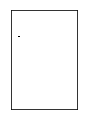

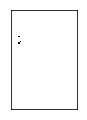

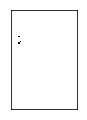

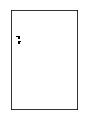

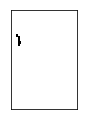

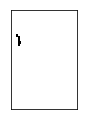

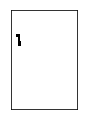

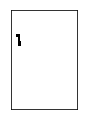

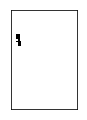

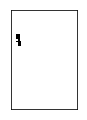

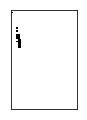

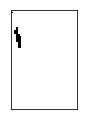

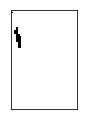

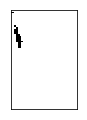

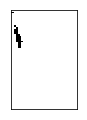

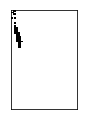

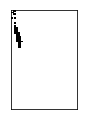

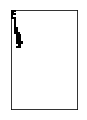

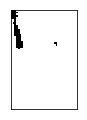

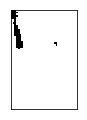

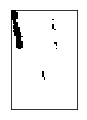

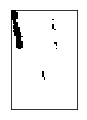

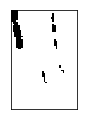

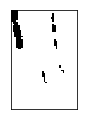

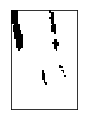

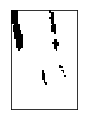

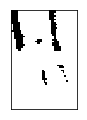

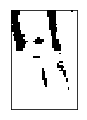

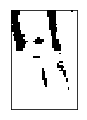

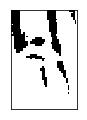

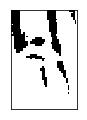

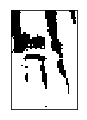

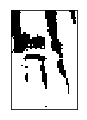

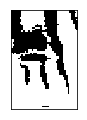

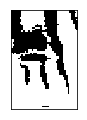

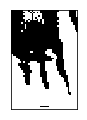

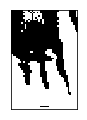

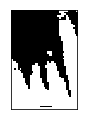

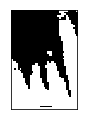

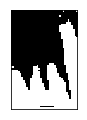

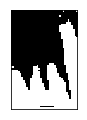

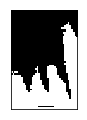

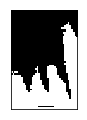

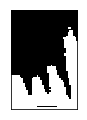

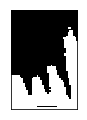

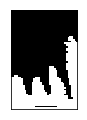

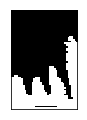

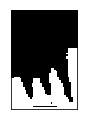

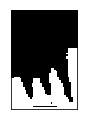

In [9]:
import cv2
from matplotlib import pyplot as plt

fn = 'dst.png'
im_gray = cv2.imread('dst.png', cv2.IMREAD_GRAYSCALE)
thresh = 127
for i in range(50):
    im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
    thresh = thresh +1
    plt.subplot(2,3,1),plt.imshow(im_bw,'gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

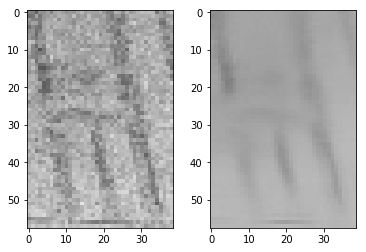

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('ttt.png')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
cv2.imwrite("dst.png",dst)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

